In [1]:
%cd ..

/nethome/bdevnani3/vis_lang


In [6]:
from cifar10 import *
from cifar100 import *
from cifar100_emb import *
from cifar100_emb_bert import *
from cifar10_emb import *
from cifar10_emb_loss_cosine import *
from cifar10_emb_loss_dot import *
from cifar10_emb_clip import *
from cifar10_emb_bert import *

from utils import *

In [14]:
def init_model(ModelClass):
    variant = ModelClass(init_root())
    if isinstance(variant, Cifar10EmbBert):
        variant.set_up_model_architecture(768)
    else:
        variant.set_up_model_architecture(300)
    variant.load_best()
    return variant

models = [init_model(_cls) for _cls in [Cifar10Emb, Cifar10EmbBert]]

In [15]:
cifar100 = Cifar100Emb(init_root())
cifar100.init_word_vectors()
cifar100.init_datasets()
cifar100.remove_classes()
cifar100.init_dataloaders()
cifar100.set_up_model_architecture(300)
cifar100.init_word_lookup()

Files already downloaded and verified
Files already downloaded and verified


In [16]:
cifar100_bert = Cifar100EmbBert(init_root())
cifar100_bert.init_datasets()
cifar100_bert.init_dataloaders()
cifar100_bert.set_up_model_architecture(768)
cifar100_bert.init_bert_model()
cifar100_bert.init_word_lookup()

Files already downloaded and verified
Files already downloaded and verified
Initializing stsb-bert-base...


In [22]:
torch.set_grad_enabled(False)

preds = {k: [] for k in models}
gt = []

for i, data in enumerate(cifar100.test_loader):
    inputs, labels = data
    gt += labels.tolist()

    device = get_device()
    inputs, labels = inputs.to(device), labels.to(device)

    for variant in models:
        outputs = variant.model(inputs)
        if isinstance(variant, Cifar10EmbBert):
            preds[variant] += cifar100_bert.find_closest_words(cifar100_bert.model.word_lookup, outputs, mode=variant.similarity_mode).tolist()
        else:
            preds[variant] += cifar100.find_closest_words(cifar100.model.word_lookup, outputs, mode=variant.similarity_mode).tolist()

gt = np.array(gt)
for variant in preds:
    preds[variant] = np.array(preds[variant])

In [23]:
# Print accuracies
for variant in models:
    acc = (preds[variant] == gt).mean()
    print(f'{variant.variant_name:30s}: {acc*100:6.2f}%')

cifar10_emb                   :   1.63%
cifar10_emb_bert_clip         :   3.20%


/nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4

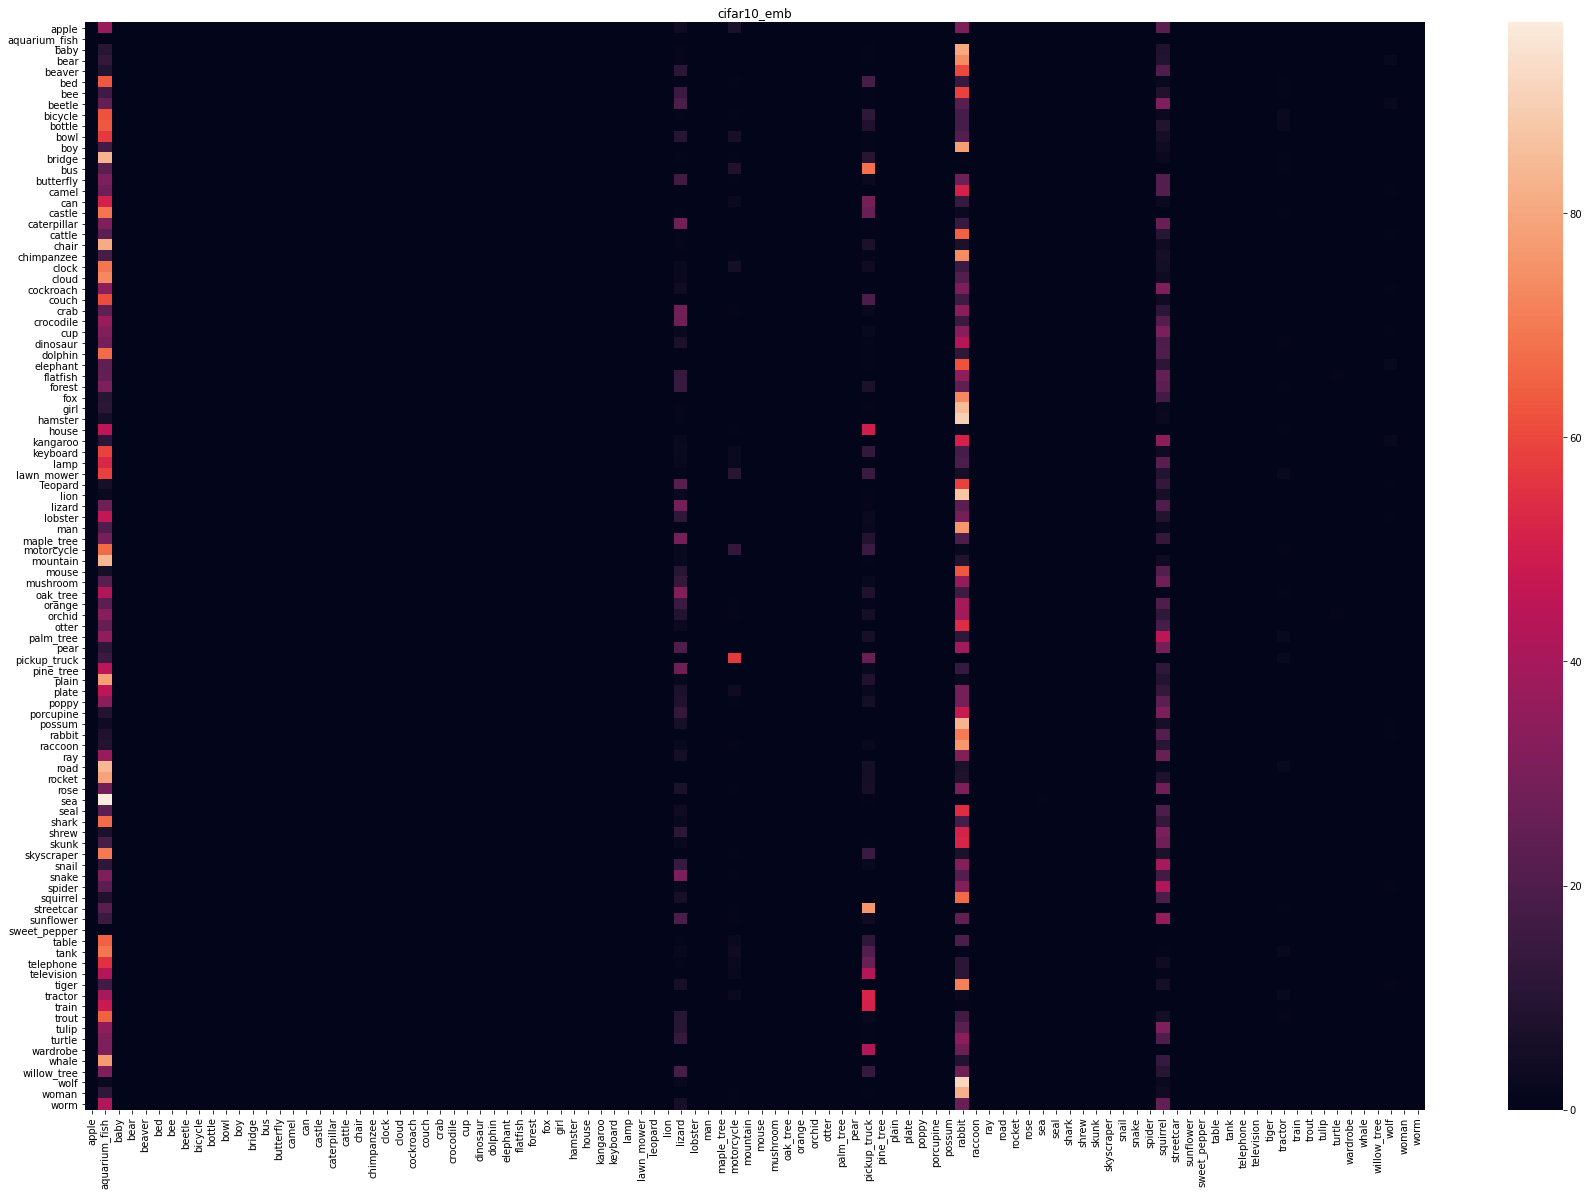

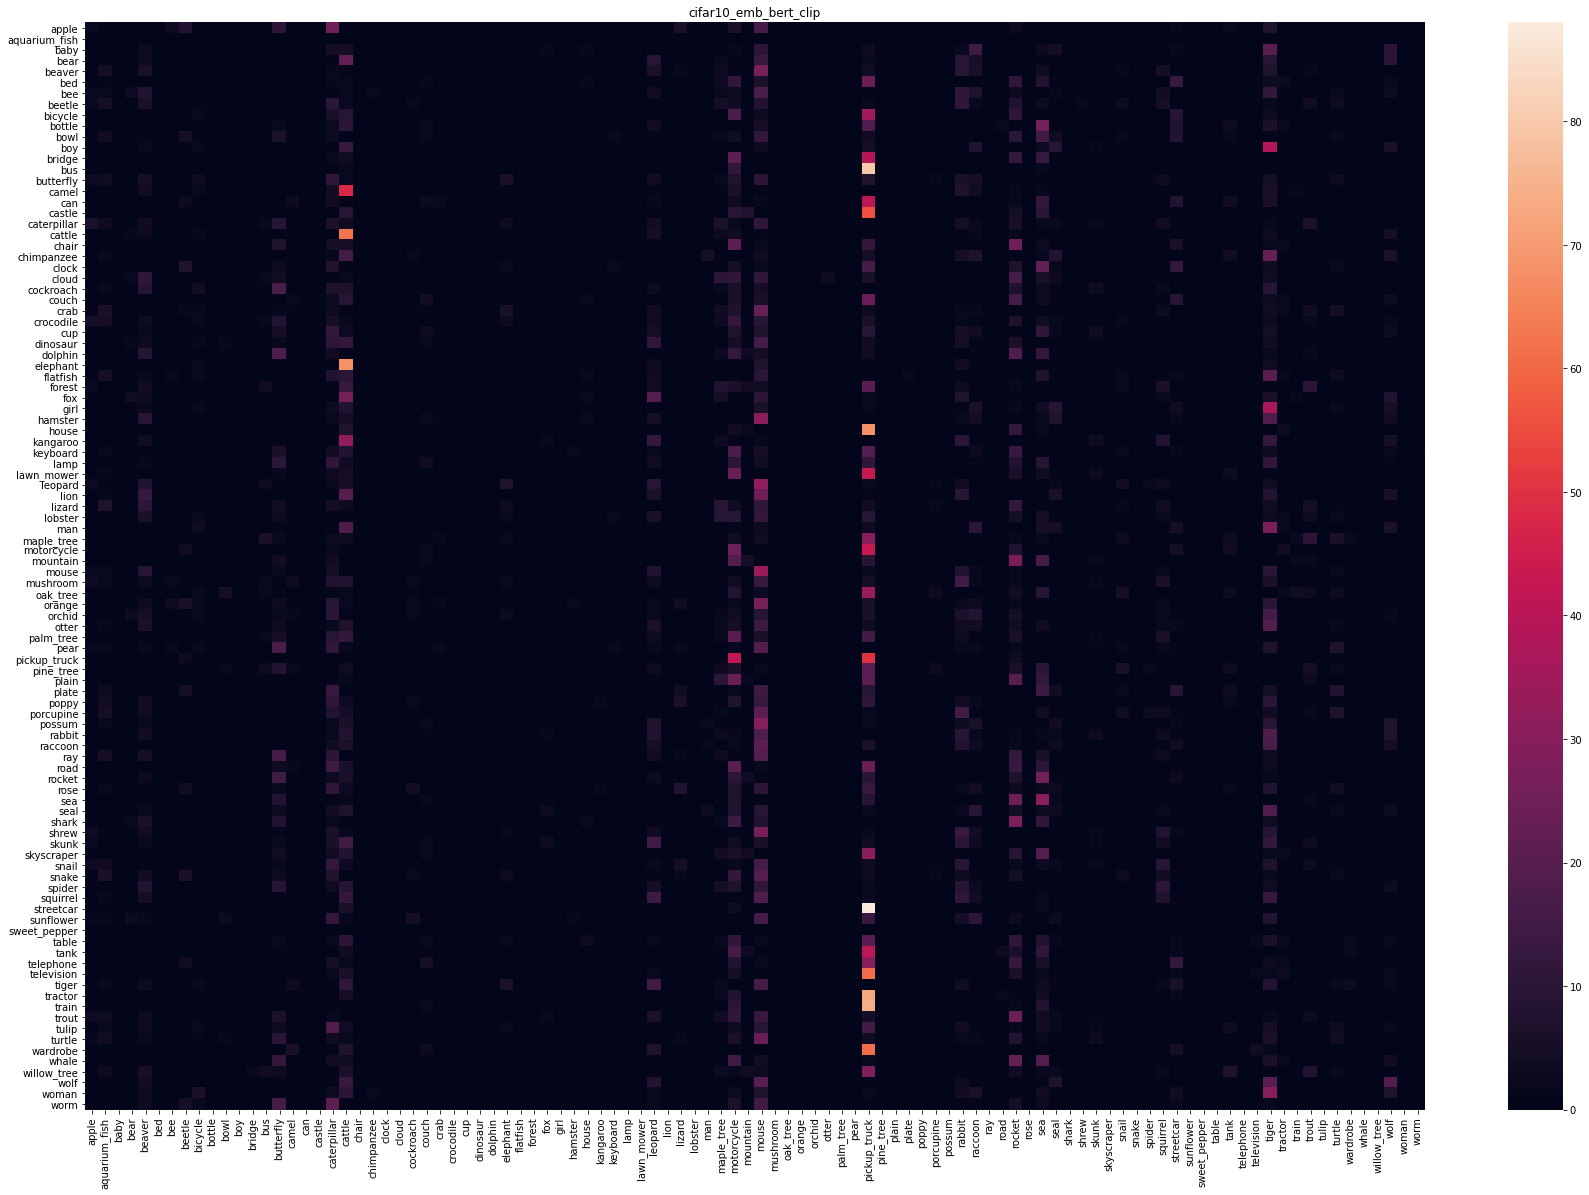

In [24]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

class_names = cifar100.class_names # [x for x in cifar100.class_names if x not in cifar100.classes_to_remove]

confusion_matrices = {}

for variant in preds:
    C = metrics.confusion_matrix(gt, preds[variant], list(range(len(class_names))))
    confusion_matrices[variant] = C

    plt.figure(figsize=(30, 20))
    plt.title(variant.variant_name)
    sn.heatmap(pd.DataFrame(C, index=class_names, columns=class_names), annot=False)

In [33]:
cifar10 = Cifar10Emb(init_root())
cifar10.init_word_vectors()
cifar10.init_datasets()
cifar10.init_dataloaders()
cifar10.set_up_model_architecture(300)
cifar10.init_word_lookup()
cifar10_bert = Cifar10EmbBert(init_root())
cifar10_bert.init_datasets()
cifar10_bert.init_dataloaders()
cifar10_bert.set_up_model_architecture(768)
cifar10_bert.init_bert_model()
cifar10_bert.init_word_lookup()

I0220 14:37:31.110126 16524 utils_any2vec.py:274] loading projection weights from C:\Users\Daniel/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
I0220 14:38:08.856363 16524 utils_any2vec.py:297] loaded (3000000, 300) matrix from C:\Users\Daniel/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
I0220 14:38:12.436364 16524 SentenceTransformer.py:39] Load pretrained SentenceTransformer: stsb-bert-base
I0220 14:38:12.436364 16524 SentenceTransformer.py:43] Did not find folder stsb-bert-base
I0220 14:38:12.437361 16524 SentenceTransformer.py:49] Try to download model from server: https://sbert.net/models/stsb-bert-base.zip
I0220 14:38:12.437361 16524 SentenceTransformer.py:100] Load SentenceTransformer from folder: C:\Users\Daniel/.cache\torch\sentence_transformers\sbert.net_models_stsb-bert-base
Initializing

In [68]:
def find_closest_words(
    word_lookup: torch.Tensor,
    x: torch.Tensor,
    mode: str = "l2",
    eps: float = 0.00001,
) -> torch.Tensor:
    """
    Given a size [N, c] lookup table (N classes, c channels per vector) and a set of [M, c] vectors to look up,
    returns a size [M] vector of indices from 0 to N-1 containing the closest vector in the lookup for that input.

    Modes:
        l2     - Computes pairwise L2 distance and chooses the lowest one.
        cossim - Computes pairwise cosine similarity, and chooses the most similar.
        dot    - Computes pairwise dot product similarity, and choses the most similar
    """
    N, c = word_lookup.shape
    M, c2 = x.shape

    assert (
        c == c2
    ), "The lookup should have the same number of channels as the input."

    if mode == "l2":
        return ((word_lookup[None, :, :] - x[:, None, :]) ** 2).sum(dim=-1)
    elif mode == "cossim":
        # Note: we don't need to divide by the length of x here, because it's the same for the argmax.
        # Also, it's imporant that we can get away with that for numerical stability.
        return 1 - (x @ word_lookup.t()) / (word_lookup.norm(dim=-1)[None, :] + eps)
    elif mode == "dot":
        return -(x @ word_lookup.t())
    else:
        raise NotImplementedError




for variant in preds:
    C = confusion_matrices[variant]

    classes_output = C.sum(axis=0)

    if isinstance(variant, Cifar10EmbBert):
        distance_matrix = find_closest_words(cifar100_bert.model.word_lookup, cifar10_bert.model.word_lookup, mode=variant.similarity_mode)
    else:
        distance_matrix = find_closest_words(cifar100.model.word_lookup, cifar10.model.word_lookup, mode=variant.similarity_mode)

    total = classes_output.sum()

    np.set_printoptions(formatter={'float': lambda x: "{0:6.2f}".format(x)})
    # print('%25s' % variant.variant_name, (distance_matrix.cpu().numpy() @ classes_output) / total)

    print('%25s' % variant.variant_name, '||' + '|'.join(['%13s' % cifar100.class_names[x] for x in torch.topk(-distance_matrix.min(dim=0)[0], 10)[1].tolist()]))

print(cifar10.class_names)

              cifar10_emb || pickup_truck|      tractor|       rabbit|     squirrel|       lizard|       turtle|   motorcycle|aquarium_fish| sweet_pepper|          fox
         cifar10_emb_clip || pickup_truck|         wolf|       lizard|     squirrel|      tractor|       turtle|        snail|      raccoon|        otter|       rabbit
  cifar10_emb_loss_cosine || pickup_truck|         wolf|       lizard|     squirrel|      tractor|       turtle|        snail|      raccoon|        otter|       rabbit
     cifar10_emb_loss_dot ||         wolf| pickup_truck|        trout|       beetle|       lizard|      raccoon|        otter|      tractor|     squirrel|       turtle
         cifar10_emb_bert || pickup_truck|        mouse|        tiger|          sea|   motorcycle|      leopard|       rocket|       turtle|         bear|    porcupine
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [63]:
[cifar100.class_names[x] for x in torch.topk(-distance_matrix.min(dim=0)[0], 10)[1].tolist()]

['pickup_truck',
 'mouse',
 'tiger',
 'sea',
 'motorcycle',
 'leopard',
 'rocket',
 'turtle',
 'bear',
 'porcupine']